### Imports

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

### 1) Discretization: defining consts & funcs

In [56]:
# M - number of points in space
# N - number of points in time
N, M = 1000, 200
Ω = np.linspace(0,2,M+1)
T = np.linspace(0,5,N+1)
δx = Ω[1]-Ω[0]
δt = T[1]-T[0]

u_exact = lambda a, t, c: u0(a-c*t)
u0 = lambda x: np.sin(2*np.pi*x)

CFL = lambda c: c*(T[1]-T[0])/(Ω[1]-Ω[0])

In [57]:
δt, δx

(0.005, 0.01)

### 2.a Upwind Scheme Implementation

In [58]:
def upwind(c, t, u_n):
    u_n_1 = u_n.copy() # only consider changes from time n to n+1
    for i in range(1,M+1): # iterate over space
        u_n_1[i] += -c*δt/δx*(u_n[i]-u_n[i-1])
    u_n_1[0] = u_exact(Ω[0],t+δt,c) # boundary term
    return u_n_1

### 2.b

In [59]:
c = 0.2

In [41]:
CFL(c)

0.1

In [42]:
u = u0(Ω)

In [43]:
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    line.set_data(Ω, U[i])
    return line

In [44]:
U = np.empty((N+1,M+1))
U[0] = u0(Ω)
for i in range(1,N+1):
    U[i] = upwind(c, i*δt, U[i-1])

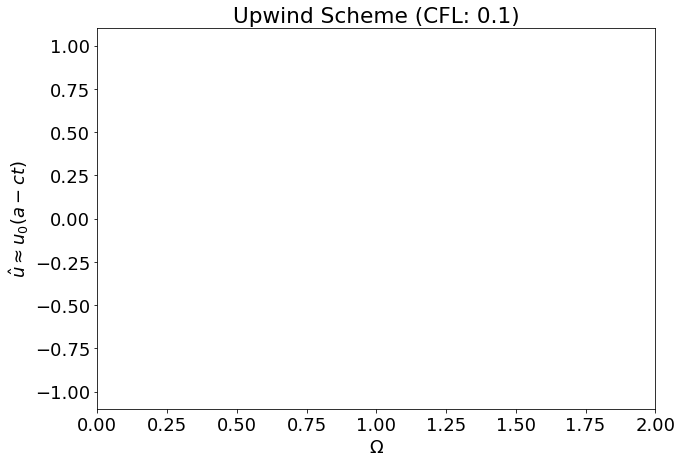

In [45]:
fig = plt.figure(2, figsize=(10,7))
ax = plt.axes(xlim=(0,2),ylim=(-1.1,1.1))
line, = ax.plot([],[])
anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=N, interval=50, blit=False)
plt.rcParams.update({'font.size':18})
plt.title('Upwind Scheme (CFL: '+str(np.round(CFL(c),2))+')')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\hat{u} \approx u_0(a-c t)$')
plt.show()

In [50]:
c = 5

In [51]:
CFL(c)

2.5

In [52]:
U = np.empty((N+1,M+1))
U[0] = u0(Ω)
for i in range(1,N+1):
    U[i] = upwind(c, i*δt, U[i-1])

/tmp/ipykernel_48475/196562349.py:4: RuntimeWarning: overflow encountered in double_scalars
  u_n_1[i] += -c*δt/δx*(u_n[i]-u_n[i-1])
/tmp/ipykernel_48475/196562349.py:4: RuntimeWarning: invalid value encountered in double_scalars
  u_n_1[i] += -c*δt/δx*(u_n[i]-u_n[i-1])


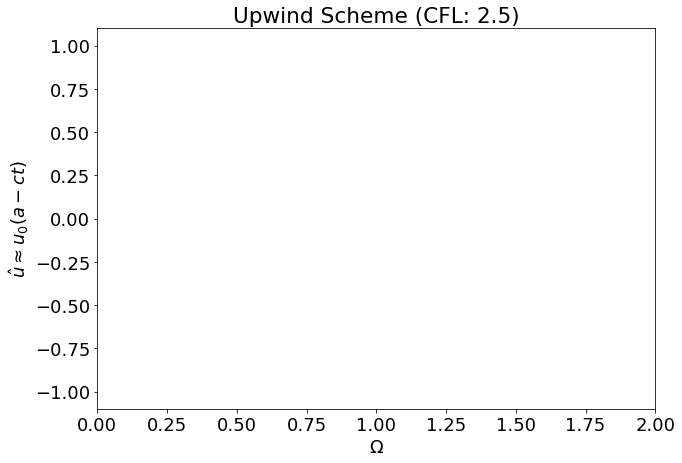

In [53]:
fig = plt.figure(2, figsize=(10,7))
ax = plt.axes(xlim=(0,2),ylim=(-1.1,1.1))
line, = ax.plot([],[])

anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=N, interval=50, blit=False)
plt.rcParams.update({'font.size':18})
plt.title('Upwind Scheme (CFL: '+str(np.round(CFL(c),2))+')')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\hat{u} \approx u_0(a-c t)$')
plt.show()

### 2.c

In [46]:
c = 2.

In [47]:
CFL(c)

1.0

In [48]:
U = np.empty((N+1,M+1))
U[0] = u0(Ω)
for i in range(1,N+1):
    U[i] = upwind(c, i*δt, U[i-1])

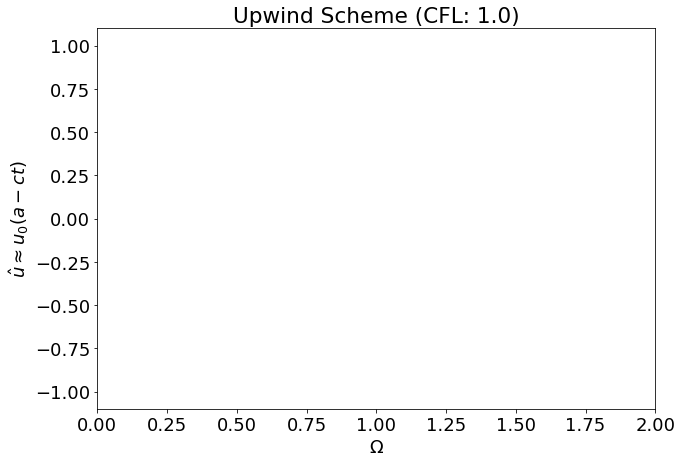

In [49]:
fig = plt.figure(2, figsize=(10,7))
ax = plt.axes(xlim=(0,2),ylim=(-1.1,1.1))
line, = ax.plot([],[])

anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=N, interval=50, blit=False)
plt.rcParams.update({'font.size':18})
plt.title('Upwind Scheme (CFL: '+str(np.round(CFL(c),2))+')')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\hat{u} \approx u_0(a-c t)$')
plt.show()

### 2.c

TODO explain

### 2.e

In [54]:
c = -1.

In [21]:
CFL(c)

-0.5

In [22]:
U = np.empty((N+1,M+1))
U[0] = u0(Ω)
for i in range(1,N+1):
    U[i] = upwind(c, i*δt, U[i-1])

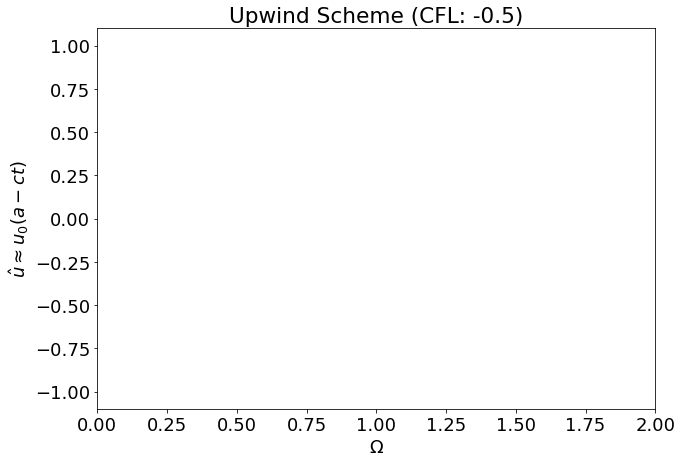

In [23]:
fig = plt.figure(2, figsize=(10,7))
ax = plt.axes(xlim=(0,2),ylim=(-1.1,1.1))
line, = ax.plot([],[])

anim = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=N, interval=50, blit=False)
plt.rcParams.update({'font.size':18})
plt.title('Upwind Scheme (CFL: '+str(np.round(CFL(c),2))+')')
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\hat{u} \approx u_0(a-c t)$')
plt.show()

### 3.a

In [60]:
u_exact

<function __main__.<lambda>(a, t, c)>

In [65]:
def lax_wendroff(c, t, u_n):
    u_n_1 = u_n.copy()
    for i in range(1,M):
        u_n_1 += δt*(
            -(c/(2*δx))*(u_n[i+1]-u_n[i-1]) +
            c*c*δt/2/δx/δx*(u_n[i+1]-2*u_n[i]+u_n[i-1])
        )
    u_n_1[0] = u_exact(Ω[0], t, c)
    u_n_1[-1] = u_exact(Ω[-1], t, c)
    return u_n_1

In [66]:
c = 0.1

In [67]:
CFL(c)

0.05

In [73]:
U = np.empty((N+1,M+1,2))
U[0,:,0] = u0(Ω)
U[0,:,1] = u0(Ω)
for i in range(1,N+1):
    U[i,:,0] = lax_wendroff(c, i*δt, U[i-1,:,0])
    U[i,:,1] = u_exact(Ω, i*δt, c)

In [74]:
U.shape

(1001, 201, 2)

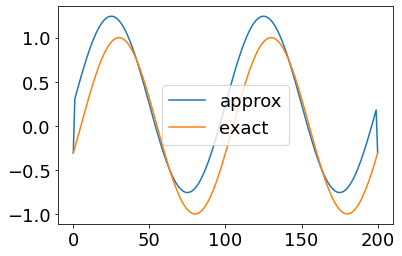

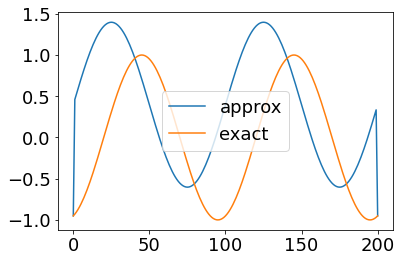

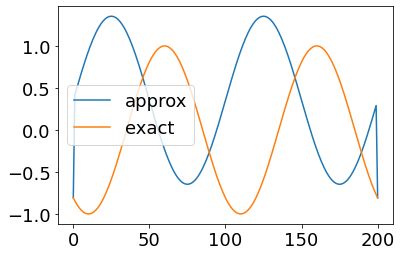

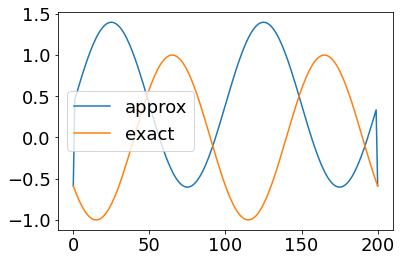

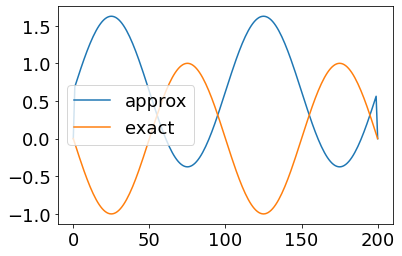

In [75]:
for row in U[::100]: 
    plt.plot(row[:,0], label='approx'); 
    plt.plot(row[:,1], label='exact'); 
    plt.legend()
    plt.show();